In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from matplotlib.colors import LogNorm
import pickle as pkl


In [2]:
intrin1 = pd.read_csv('TextFiles/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/FinalSelection/avgscore/eventlist_intrinsics_run1.txt',delimiter=' ')
intrin2 = pd.read_csv('TextFiles/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/FinalSelection/avgscore/eventlist_intrinsics_run2.txt',delimiter=' ')
intrin3 = pd.read_csv('TextFiles/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/FinalSelection/avgscore/eventlist_intrinsics_run3.txt',delimiter=' ')


In [6]:
mode = 'Analysis'
cuts = 'sigprobavg>0.95 and \
        label==\'nue_ccqe\''
if mode=='Analysis':
    cuts += 'and \
             Enu_1e1p<1200 and \
             Enu_1e1p>200'
intrin = pd.concat((intrin1,intrin2,intrin3)).query(cuts)

In [7]:
fracerr = (intrin['Enu_1e1p'] - intrin['EnuTrue'])/intrin['EnuTrue']

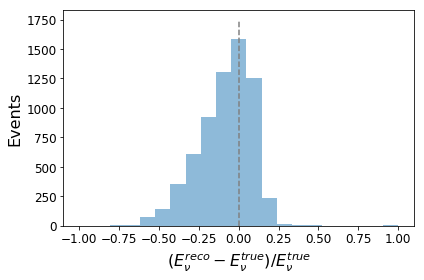

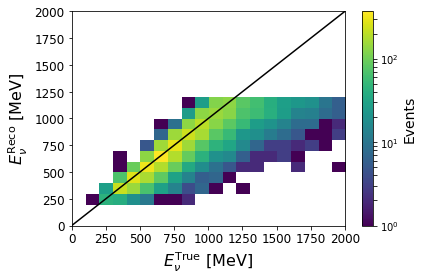

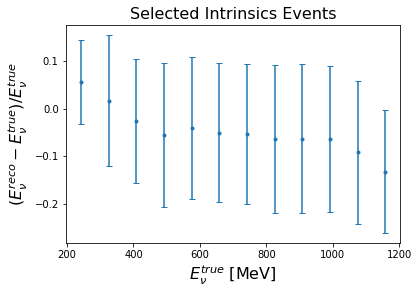

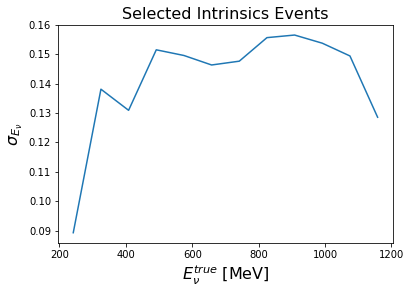

In [8]:
n,_,_ = plt.hist(fracerr,range=(-1,1),bins=21,alpha=0.5)
plt.xlabel(r'$(E_\nu^{reco} - E_\nu^{true})/E_\nu^{true}$',fontsize=16)
plt.ylabel('Events',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Selected Intrinsics Events',fontsize=16)
plt.plot([0,0],[0,1.1*max(n)],linestyle='--',color='grey')
plt.tight_layout()
plt.savefig('Plots/PRD_plots/NuEnergyFracError_%s.png'%mode,dpi=100)
plt.show()
pkl.dump(  plt.gcf(),  open('Plots/PRD_plots/NuEnergyFracError_%s.pickle'%mode,  'wb')  )
plt.clf()

plt.hist2d(intrin['EnuTrue'],intrin['Enu_1e1p'],range=((0,2000),(0,2000)),bins=20,norm=LogNorm())
cb = plt.colorbar(label='Events')
cb.set_label(label='Events',fontsize=14)
plt.xlabel(r'$E_\nu^{\rm True}$ [MeV]',fontsize = 16)
plt.ylabel(r'$E_\nu^{\rm Reco}$ [MeV]',fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot([0,2000],[0,2000],color='black')
#plt.title(r'$\nu_e$ Intrinsic MC Events Across all Runs',fontsize=14)
plt.tight_layout()
plt.savefig('Plots/PRD_plots/NuEnergy2D_%s.png'%mode,dpi=100)
plt.show()
pkl.dump(  plt.gcf(),  open('Plots/PRD_plots/NuEnergy2D_%s.pickle'%mode,  'wb')  )
plt.clf()

x = intrin['EnuTrue']
y=fracerr

means_result = scipy.stats.binned_statistic(x, [y, y**2], bins=12, range=(200,1200), statistic='mean')
means, means2 = means_result.statistic
standard_deviations = np.sqrt(means2 - means**2)
bin_edges = means_result.bin_edges
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.

plt.errorbar(x=bin_centers, y=means, yerr=standard_deviations, linestyle='none', marker='.',capsize=3)
plt.ylabel(r'$(E_\nu^{reco} - E_\nu^{true})/E_\nu^{true}$',fontsize=16)
plt.xlabel(r'$E_\nu^{true}$ [MeV]',fontsize=16)
plt.title('Selected Intrinsics Events',fontsize=16)
plt.show()

plt.plot(bin_centers, standard_deviations)
plt.ylabel(r'$\sigma_{E_\nu}$',fontsize=16)
plt.xlabel(r'$E_\nu^{true}$ [MeV]',fontsize=16)
plt.title('Selected Intrinsics Events',fontsize=16)
plt.show()

